# Diabetic Epidemic

Group: Glucose Guardians

Names: Daniel Kauber, Lionel Huang, Jahaziel Martinez, Sanat Tayal

## What is the Problem?


A confronting problem that many people have today is being unaware of their unhealthy lifestyle choices that lead to chronic diseases like diabetes. These lifestyle choices include diets, addictions, physical fitness habits, and many others. Our interest is in finding correlation between features gathered by the BRFSS (Behavioral Risk Factor Surveillance System), and the risk and potential diagnosis of diabetes. This is important because over 100,000,000 Americans are either prediabetic or already have diabetes, and with this research, patterns that often lead to diabetes can be isolated and perhaps help create preventative measures for diabetes in the near future. This project looks to understand these correlations, which in turn can help us help others recognize their habits and inhibit real change. With this problem in mind, the following questions were drafted to guide our project and help stop the diabetic epidemic in the United States.


The first question that this project looks to solve is: "What lifestyle factors play a role in the development or diagnosis of diabetes?".


The second question that this project looks to solve is: "How can the average person recognize these factors  and make changes in their lives?".


## Data Collection:

This dataset was collected by the CDC through the Behavioral Risk Factor Surveillance System (BRFSS) in 2015, surveying 441,445 American adults on their health behaviors and conditions. This project uses a cleaned subset of this data which is available on Kaggle, with 253,680 responses and 21 factors. Among these factors were body mass index (BMI), smoking habits, and other factors that play into a person's overall physical health. The data covers the adult U.S. population, but due to how the data was collected, there are potential biases and limitations. Non-response bias is possible since participation in this study was voluntary, and people could opt out of responding, which would lead to an underrepresentation of certain demographics or viewpoints. Alongside this, there may be self-reporting bias because the data is based on people's own responses and their willingness to disclose personal information accurately. This can lead to errors, especially for sensitive topics or complex health conditions. Also, since the data captures 2015, we can't indicate any long-term health trends confidently from this data.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


diabetes = pd.read_csv('/diabetes.csv')
diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Data Preparation:
Prior to conducting our analysis in this project, four steps were taken to prepare and clean the data. The first step was adjusting the age predictor variable. In the original dataset, age was measured by one of 13 categories, each representing a range of ages. To make interpretation of this simpler, the column was adjusted to make each range represented by its average age. For example, the categories were represented by numbers 1 through 13, with 1 representing an age range of 18-24. In our preparation stage, our group changed this range to be represented by the number 21 to make model interpretation and visualization interpretation easier. The next step that was taken to prepare the data was to alter the education predictor variable. Similarly to the age variable, this variable is represented with a number from 1-6, each representing a different level of education. To make the interpretation of this variable simpler, this variable was altered to depict the number of years that a person attended school. For example, a person who made it to or finished grade 12 was awarded a rank of 4 in the original dataset. This was changed in the new dataset and is now represented by the number 12. The third step taken in preparing the data was changing the income predictor variable. Originally, this variable was ranked on a scale from 1-8, each representing a different income range. To assist with interpretation, these values were altered to the median value of each range. For example, the number 5 was attributed to anyone who made more than \$25,000 a year but less than \$35,000 a year. As a result, this range is now represented by 30,000. The final step in the data preparation process was to eliminate the DiffWalk variable from the dataset. Difficulty walking is not necessarily a typical symptom of diabetes. While it can be from time to time, difficulty walking can often be indicative of other health issues, and as a result, it could be affected by some confounding variable. As a result, this column will be left out of the data analysis for this project.

In [ ]:
#Data Preparation
def change_data(diabetes):
  #Changing Age column to allow for easier analysis
  diabetes['Age'] = diabetes['Age'].replace({1.0: 21, 2.0: 27, 3.0: 32, 4.0: 37,
                                            5.0: 42, 6.0: 47, 7.0: 52, 8.0: 57,
                                            9.0: 62, 10.0: 67, 11.0: 72, 12.0: 77,
                                            13.0: 90, 14.0: np.nan})
  #Changing Education column to allow for easier analysis
  diabetes['Education'] = diabetes['Education'].replace({1.0: 0, 2.0: 8, 3: 11, 4.0: 12,
                                                        5.0: 15, 6.0: 16})
  #Changing Income column to allow for easier analysis
  diabetes['Income'] = diabetes['Income'].replace({1.0: 5000, 2.0: 12500, 3.0: 17500,
                                                  4.0: 22500, 5.0: 30000, 6.0: 42500,
                                              7.0: 62500, 8.0: 100000})
change_data(diabetes)
diabetes.drop(columns=['DiffWalk'])

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,5.0,18.0,15.0,0.0,62.0,12.0,17500.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,52.0,16.0,5000.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,5.0,30.0,30.0,0.0,62.0,12.0,100000.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,72.0,11.0,42500.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,3.0,0.0,0.0,72.0,15.0,22500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,5.0,1.0,42.0,16.0,62500.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.0,0.0,0.0,72.0,8.0,22500.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,27.0,15.0,12500.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,0.0,1.0,52.0,15.0,5000.0


## Data Exploration:

Seeing as though our project will be looking at which risk factors seem to have the most correlation to diabetes, we decided to calculate a few numbers for risk factors we hypothesized might seem to have the highest relation. For example, in our dataset, 1 is the value for a person with high cholesterol and 0 is the value for a person without high cholesterol. When we calculated the average value for high cholesterol in diabetics, it came out to be about .67, indicating that most people with diabetes tend to have high cholesterol. However, when calculating the same for people without diabetes, we found the average to be about .38 which indicates that most people without diabetes do not have high cholesterol. In comparison, when we looked at if most diabetics were smokers or not, we found that there was a slight favoritism towards smoking (mean value roughly .51), but not as large as for people with high cholesterol. Based on our early evaluation of the data, it seems as though high cholesterol and high blood pressure (mean value of .75 for diabetics) may be key indicators of a person trending towards diabetes.

**Note**: Values for smokers and high blood pressure were determined the same way as for people with high cholesterol (1 = yes smoker/high BP, 0 = no smoker/high BP)

After conducting this preliminary exploration, we decided to calculate each of the correlation coefficients for each of the predictor variables and the diabetes column. After conducting this analysis, we found that the 6 predictor variables with the highest correlation were high blood pressure, high cholesterol, BMI, general health, difficulty walking, and age. Seeing these correlations, our group decided to go more in-depth on these 6 factors as you will see throughout the rest of this project. General health had the highest correlation (.297) and was ranked on a scale of 1-5 by the participants where 1 was excellent and 5 was poor while high blood pressure had the second highest correlation(.271). The average response for people with diabetes was a score of 3.29 which indicates that people with diabetes seem to have just below average overall health. Additionally, looking at the bar chart below, you can see that a majority of the people with diabetes have a high blood pressure.

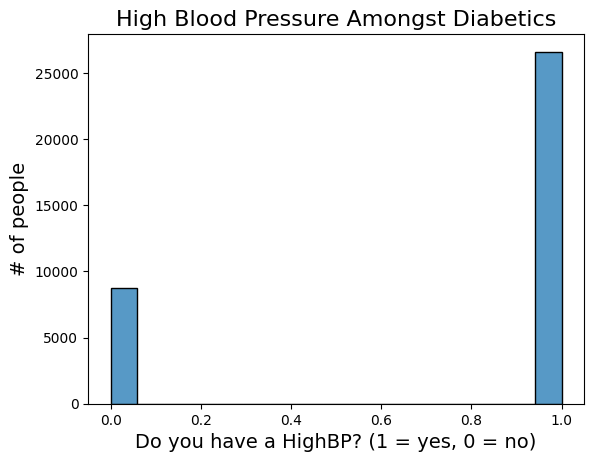

In [ ]:
data = diabetes
data['Age'].max()
diabetic = data[data['Diabetes_012'] == 2.0]
prediabetic = data[data['Diabetes_012'] == 1.0]
non = data[data['Diabetes_012'] == 0.0]
plot = sns.histplot(data = diabetic, x = 'HighBP', label = 'Diabetic')
plot.set_xlabel('Do you have a HighBP? (1 = yes, 0 = no)', fontsize=14)
plot.set_ylabel('# of people', fontsize = 14)
plot.set_title('High Blood Pressure Amongst Diabetics', fontsize=16)
d_hc = diabetic['HighChol'].mean()
n_hc = non['HighChol'].mean()
d_bp = diabetic['HighBP'].mean()
n_bpa = non['HighBP'].mean()
corrs = diabetes.corr(method = 'spearman')
corrs_table = corrs.filter(['Diabetes_012'])
corrs_table1 = corrs_table.drop(index = ['Diabetes_012'])
d_genhlth = diabetic['GenHlth'].mean()

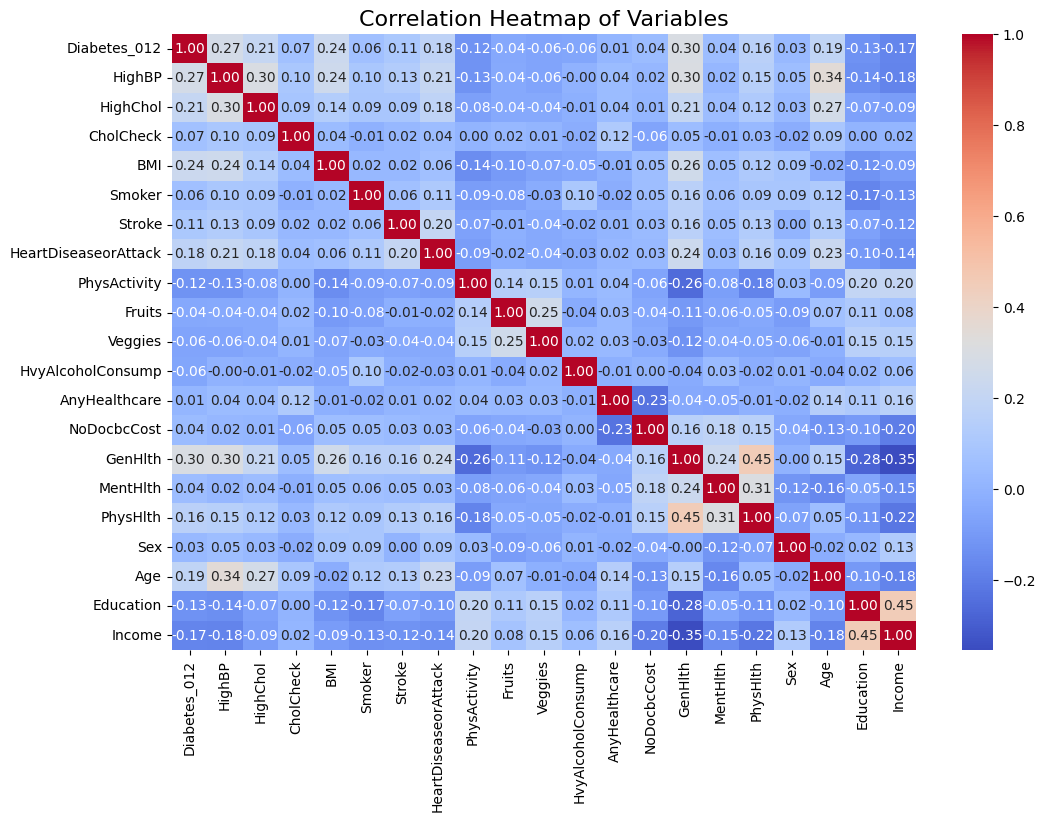

In [ ]:
plt.figure(figsize=(12, 8))
without_DiffWalk = diabetes.drop(columns=['DiffWalk'])

sns.heatmap(without_DiffWalk.corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Variables', fontsize=16)
plt.show()

#how corelated all variables are to eachother

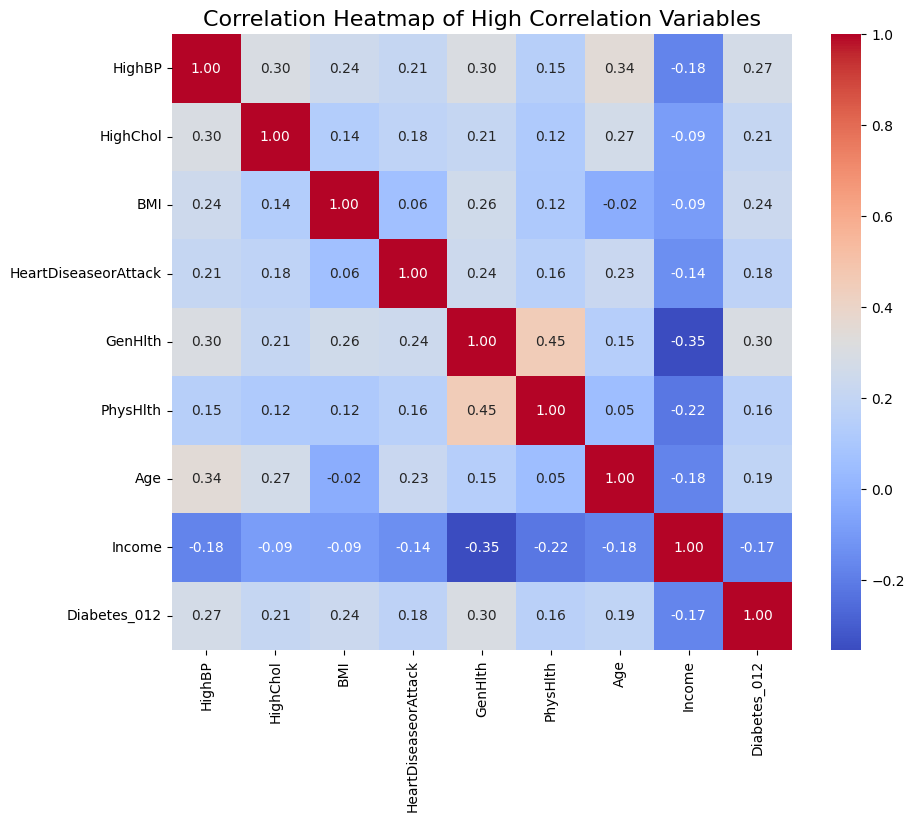

In [ ]:
# Selecting variables highly correlated with Diabetes_012 (threshold = 0.15)
correlation_threshold = 0.15
high_corr_vars = corrs_table1[abs(corrs_table1['Diabetes_012']) > correlation_threshold].index.tolist()

# Including Diabetes_012 for visualizations
high_corr_vars.append('Diabetes_012')

# Subset the dataset with these variables
high_corr_diabetes_data = diabetes[high_corr_vars]
high_corr_diabetes_data = high_corr_diabetes_data.drop(columns=['DiffWalk'])

plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_diabetes_data.corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of High Correlation Variables', fontsize=16)
plt.show()


#Below is how corrleated the highest correlated variables (with respect to Diabetes_012) are to each other

## Model Building:

Our process for building the model started with creating a new dataframe that contained only the features most strongly correlated with the target variable, `'Diabetes_012'`. These features are HighBP, HighChol, BMI, GenHlth and Age. After identifying these features, we split the data into training and testing sets to allow for proper evaluation of the model. We then assigned the features and the target variable to X and Y, respectively, within both sets. We initially built a Decision Tree model, as it is a simple yet effective method for classification tasks, however when evaluating the performance of the Decision Tree we realized that the data itself contained imbalanced categories. Due to this, we felt that our model could not accurately classify whether a person was non-diabetic, prediabetic, or diabetic. To fix the issue of the unbalanced categories, we utilized SMOTE (Synthetic Minority Over-sampling Technique), which oversamples the minority classes by generating synthetic data points, which then balances the dataset. After applying SMOTE, we retrained our original Decision Tree model, but the performance still remained low, with accuracy scores barely being above 50% for both sets. We then decided to switch to a Random Forest model, which uses a group of decision trees, improving the accuracy and strength of the model. The Random Forest model performed much better, with prediction accuracy being 75% for the training set and 73% for the testing set.

Train: 0.8424048013245033
Test: 0.842439293598234


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision (Non-Diabetic, Pre-Diabetic, Diabetic): [0.84243929 0.         0.        ]
Recall (Non-Diabetic, Pre-Diabetic, Diabetic): [1. 0. 0.]
F1-Score (Non-Diabetic, Pre-Diabetic, Diabetic): [0.91448255 0.         0.        ]


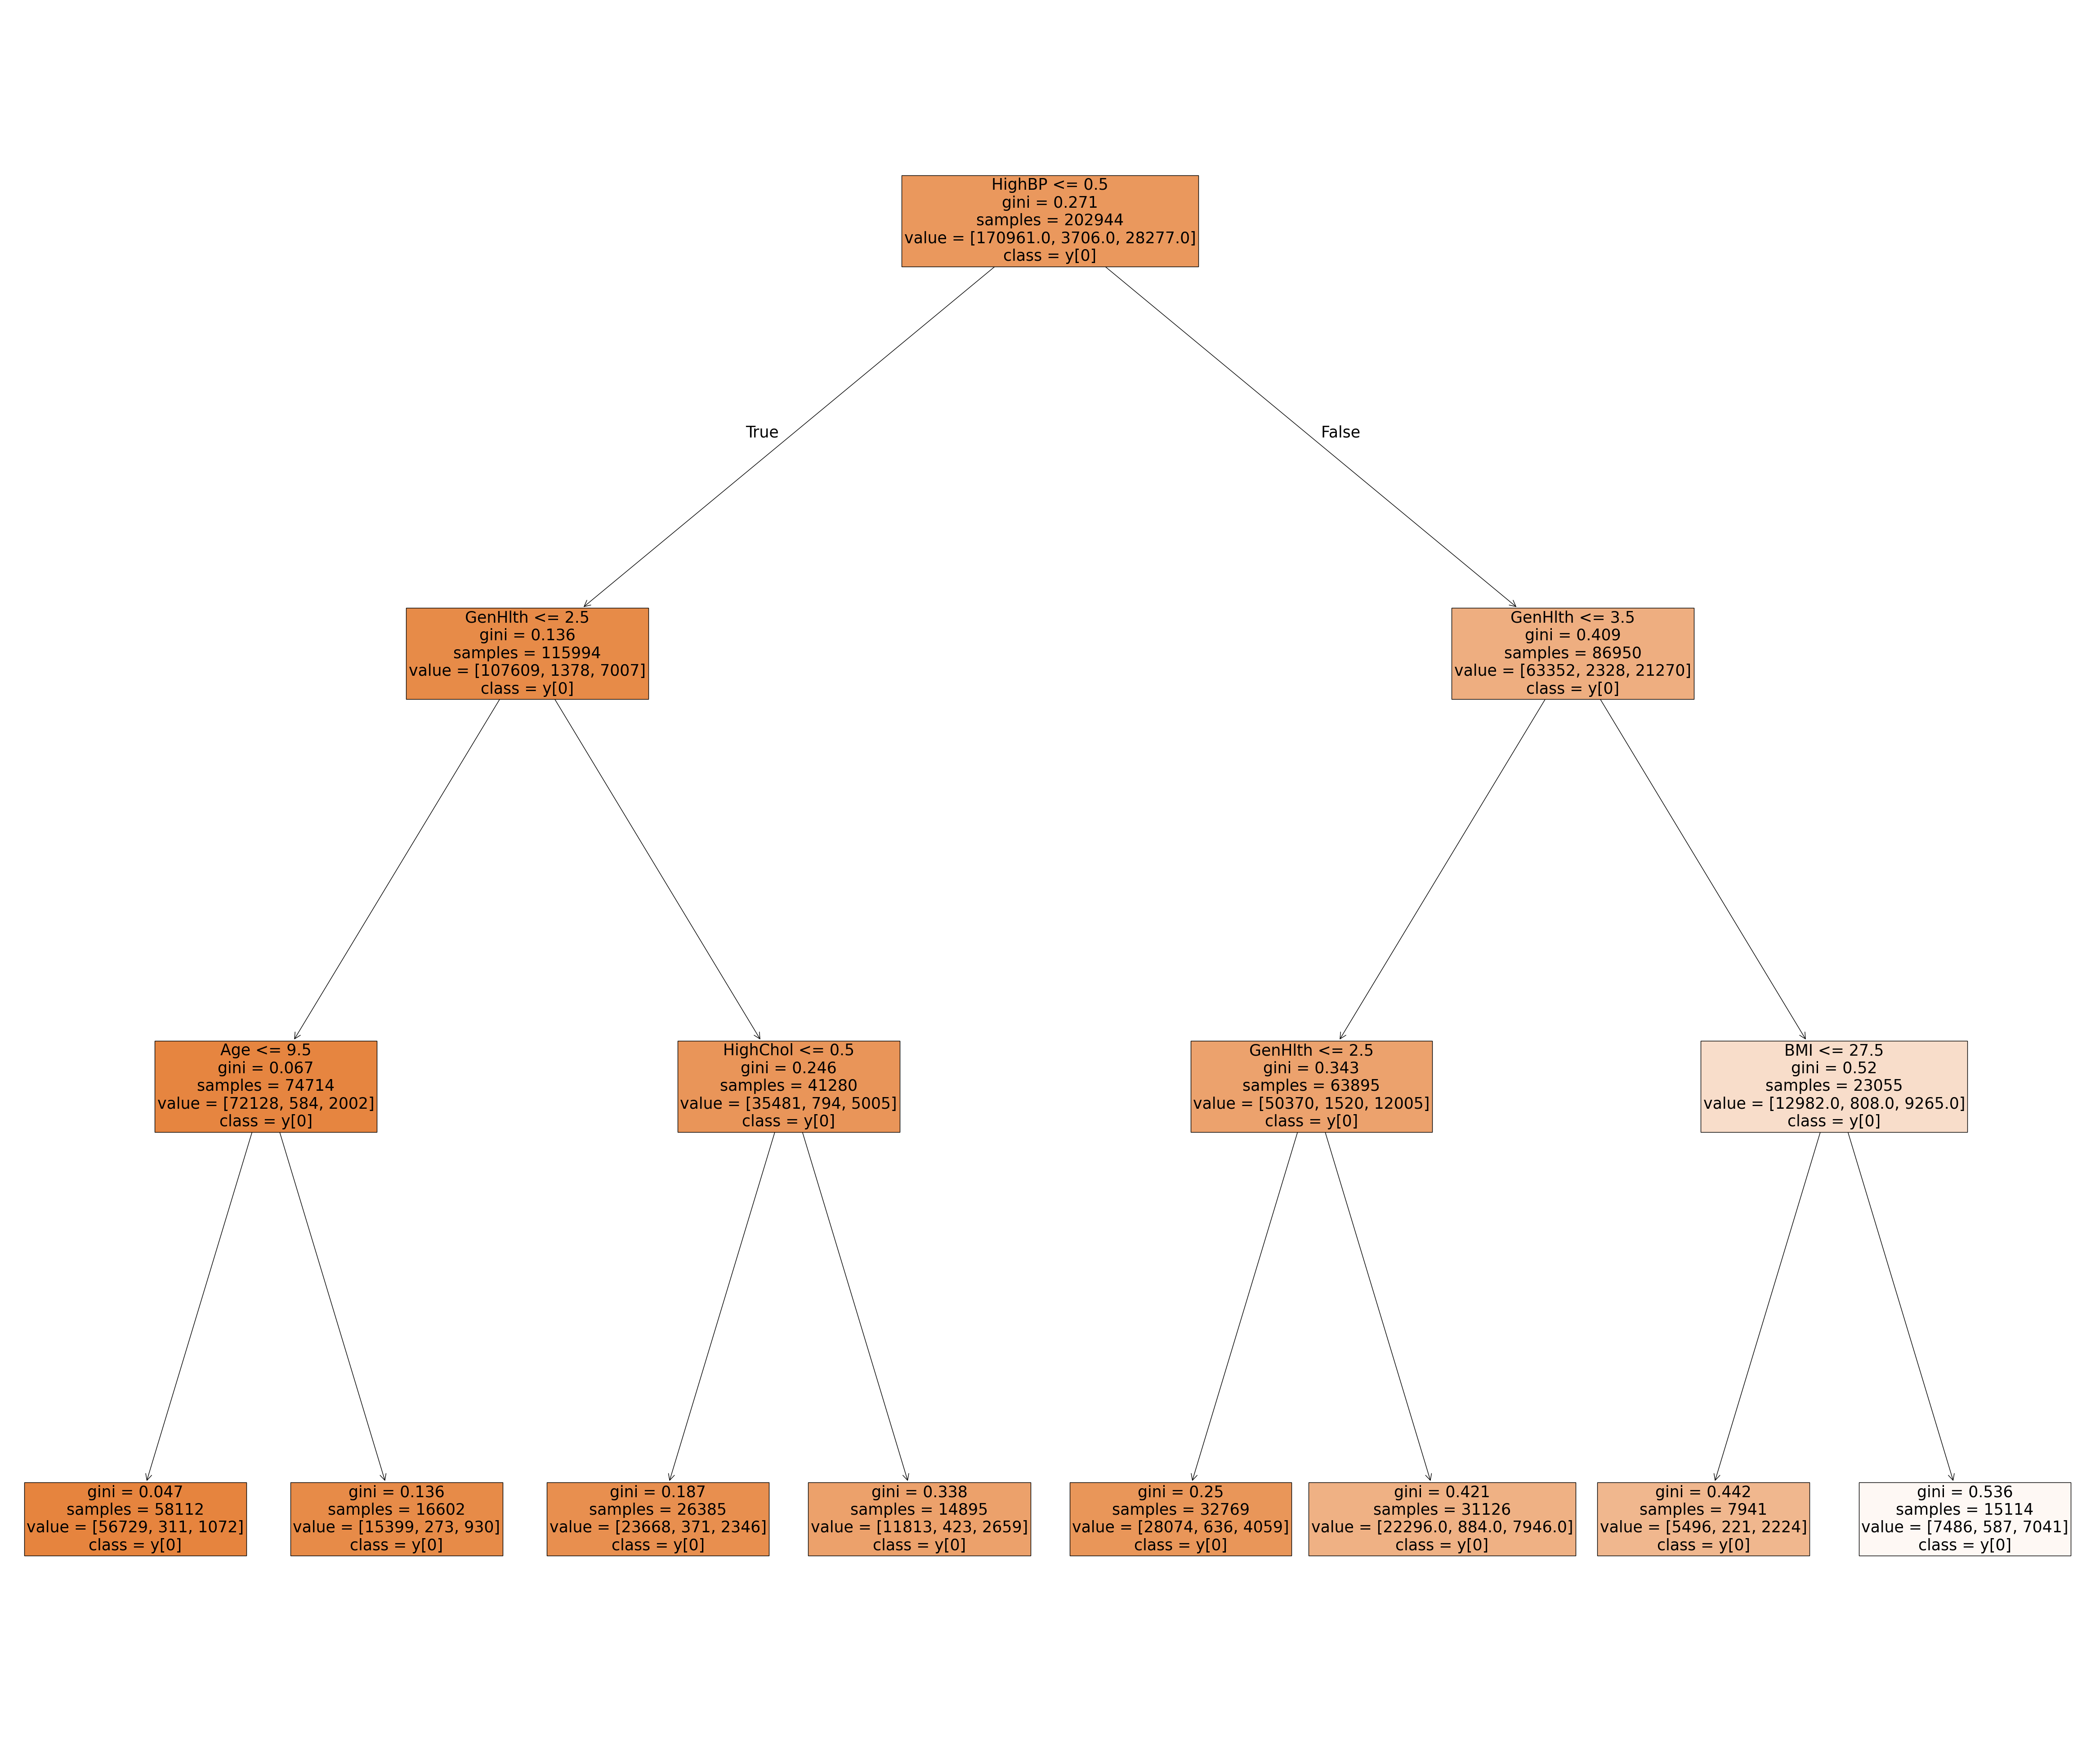

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#Getting relevant columns and cleaning them
diabetes_clean = diabetes[['HighBP', 'HighChol', 'BMI',
                     'GenHlth', 'Age',
                         'Diabetes_012']]
diabetes_clean = diabetes_clean.dropna()

#Creating test and train sets
train_diabetes = diabetes_clean.sample(frac=.8)
test_diabetes = diabetes_clean.drop(index=train_diabetes.index)

#Creating X and Y for predicting Diabetes_012
X_train_diabetes = train_diabetes.drop(columns=['Diabetes_012'])
Y_train_diabetes = train_diabetes['Diabetes_012']
X_test_diabetes = test_diabetes.drop(columns=['Diabetes_012'])
Y_test_diabetes = test_diabetes['Diabetes_012']

#Creating Decision Tree using our test and train sets
T = DecisionTreeClassifier(max_depth=3) # max depth of 4 has the best prediction score, but the visualization becomes difficult to understand/see
T.fit(X_train_diabetes, Y_train_diabetes)
train_score = T.score(X_train_diabetes, Y_train_diabetes)
test_score = T.score(X_test_diabetes, Y_test_diabetes)
print('Train:', train_score)
print('Test:', test_score)

#Make predictions
Y_pred = T.predict(X_test_diabetes)

#Precision, recall, F1_score
precision = precision_score(Y_test_diabetes, Y_pred, average=None, labels=[0, 1, 2])
recall = recall_score(Y_test_diabetes, Y_pred, average=None, labels=[0, 1, 2])
f1 = f1_score(Y_test_diabetes, Y_pred, average=None, labels=[0, 1, 2])

print(f"Precision (Non-Diabetic, Pre-Diabetic, Diabetic): {precision}")
print(f"Recall (Non-Diabetic, Pre-Diabetic, Diabetic): {recall}")
print(f"F1-Score (Non-Diabetic, Pre-Diabetic, Diabetic): {f1}")

fig, ax = plt.subplots(1, figsize = (60, 50))
p = plot_tree(T, filled = True, feature_names = X_train_diabetes.columns, class_names = True, fontsize = 25, ax=ax)

In [ ]:
#However, we can see that the data seems to be unbalanced
diabetes_clean['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,213703
2.0,35346
1.0,4631


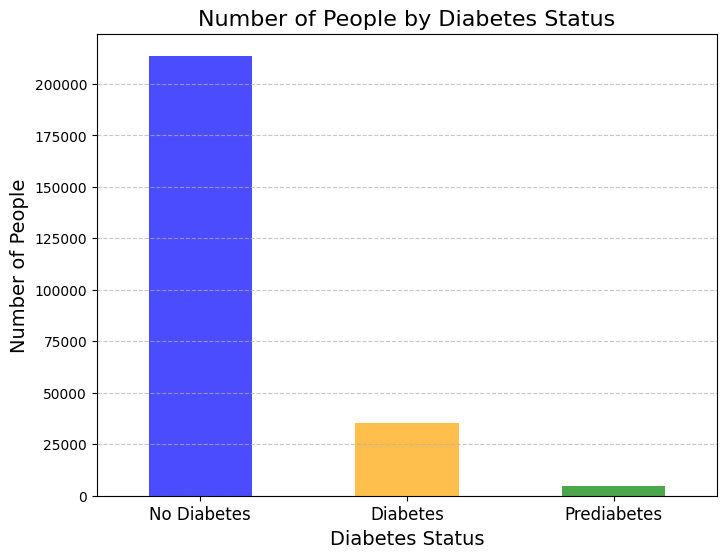

In [ ]:
#Here is a barchart to help visualize the imbalanced categories
diabetes_counts = diabetes_clean['Diabetes_012'].value_counts()
categories = {0: "No Diabetes", 1: "Prediabetes", 2: "Diabetes"}
diabetes_counts.index = diabetes_counts.index.map(categories)

plt.figure(figsize=(8, 6))
diabetes_counts.plot(kind='bar', color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Number of People by Diabetes Status', fontsize=16)
plt.ylabel('Number of People', fontsize=14)
plt.xlabel('Diabetes Status', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Since we can see that there is imbalanced data, we can use SMOTE to oversample the minority classes

# Separate X and Y
X = diabetes_clean.drop('Diabetes_012', axis=1)
Y = diabetes_clean['Diabetes_012']

#Apply SMOTE
diabetes_smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, Y_resampled = diabetes_smote.fit_resample(X, Y)

# Combine new data
diabetes_upsampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(Y_resampled)], axis=1)

In [ ]:
#Now we see that all three classes are balanced
diabetes_upsampled['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,213703
2.0,213703
1.0,213703


In [ ]:
#Creating Random Forest Model

#Creating train and test sets
train_diabetes = diabetes_upsampled.sample(frac=0.8, random_state=42)
test_diabetes = diabetes_upsampled.drop(index=train_diabetes.index)

#Defining X and Y variables
X_train_diabetes = train_diabetes.drop(columns=['Diabetes_012'])
Y_train_diabetes = train_diabetes['Diabetes_012']
X_test_diabetes = test_diabetes.drop(columns=['Diabetes_012'])
Y_test_diabetes = test_diabetes['Diabetes_012']


#Fitting the model
diabetes_rf = RandomForestClassifier(n_estimators=100, random_state=42)
diabetes_rf.fit(X_train_diabetes, Y_train_diabetes)

#Evaluating the model
train_score = diabetes_rf.score(X_train_diabetes, Y_train_diabetes)
test_score = diabetes_rf.score(X_test_diabetes, Y_test_diabetes)
print('Train:', train_score)
print('Test:', test_score)

Train: 0.7489700460335318
Test: 0.7253591427368158


Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     42755
         1.0       0.77      0.78      0.77     42725
         2.0       0.65      0.70      0.67     42742

    accuracy                           0.73    128222
   macro avg       0.73      0.73      0.73    128222
weighted avg       0.73      0.73      0.73    128222



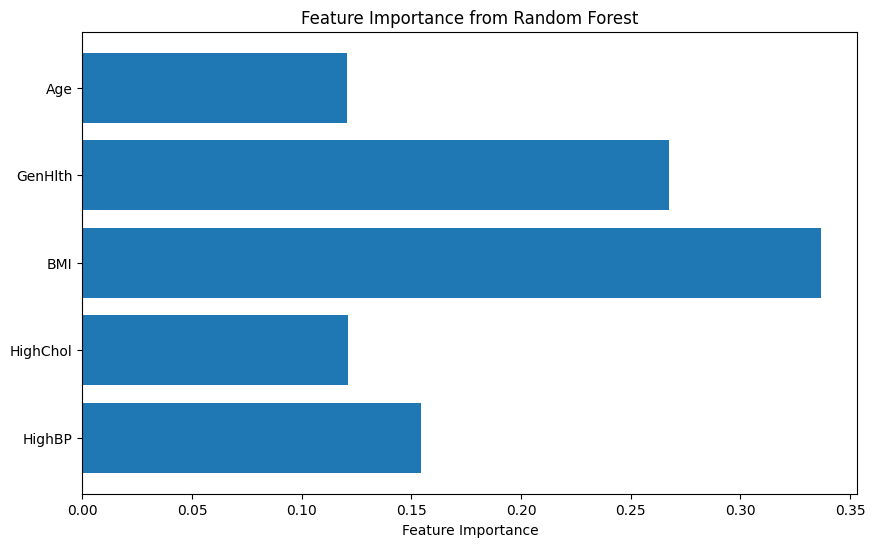

In [ ]:
#Classification Report of the Model
print("Classification Report:")
print(classification_report(Y_test_diabetes, diabetes_rf.predict(X_test_diabetes)))

#Feature Importance of the Model
plt.figure(figsize=(10, 6))
plt.barh(X_train_diabetes.columns, diabetes_rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

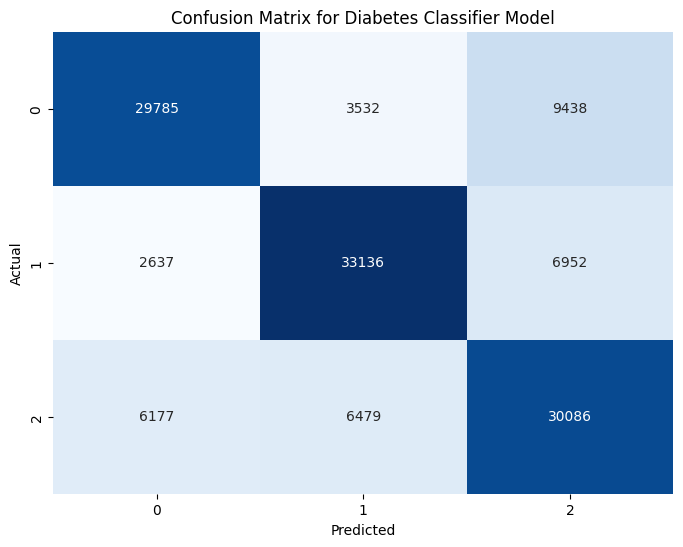

In [ ]:
#Making confusion matrix
diabetes_cm = confusion_matrix(Y_test_diabetes, diabetes_rf.predict(X_test_diabetes))

# Create a heatmap for the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'], cbar=False)
plt.title('Confusion Matrix for Diabetes Classifier Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("diabetes_confusion_matrix.png", dpi=300)
plt.show()

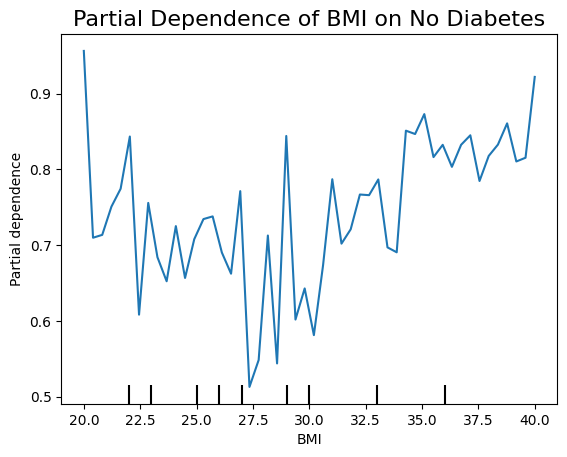

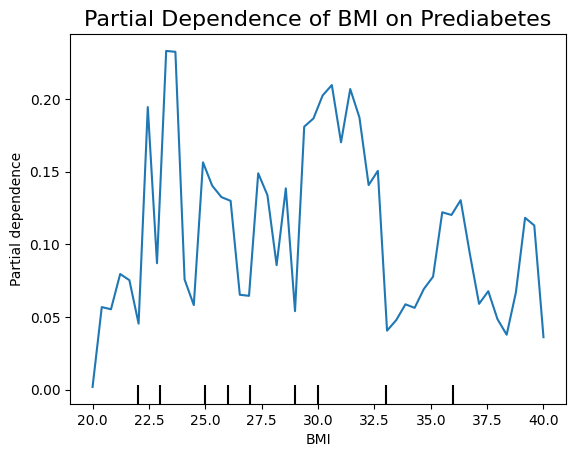

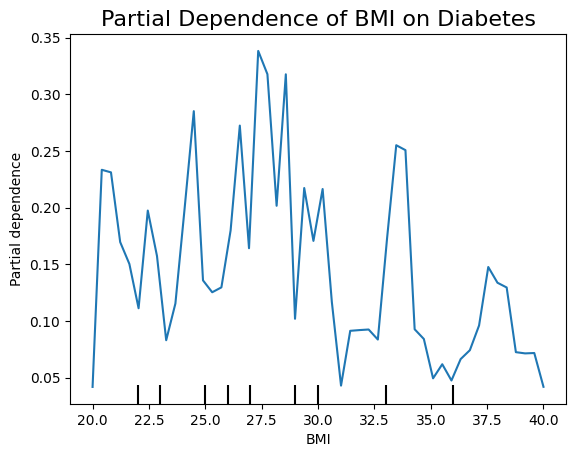

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

def plot_partial_bmi(model, X, target, label):
    PartialDependenceDisplay.from_estimator(
        model,
        X,
        ['BMI'],
        target=target,
        grid_resolution=50
    )
    plt.title(f'Partial Dependence of BMI on {label}', fontsize=16)
    plt.show()

plot_partial_bmi(diabetes_rf, X_test_diabetes, 0, 'No Diabetes')
plot_partial_bmi(diabetes_rf, X_test_diabetes, 1, 'Prediabetes')
plot_partial_bmi(diabetes_rf, X_test_diabetes, 2, 'Diabetes')


<ipython-input-40-1303bff6073c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes, x=col, hue=None, palette='Set2', showfliers=False)
<ipython-input-40-1303bff6073c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes, x=col, hue=None, palette='Set2', showfliers=False)
<ipython-input-40-1303bff6073c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes, x=col, hue=None, palette='Set2', showfliers=False)
<ipython-input-40-1303bff6073c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is depre

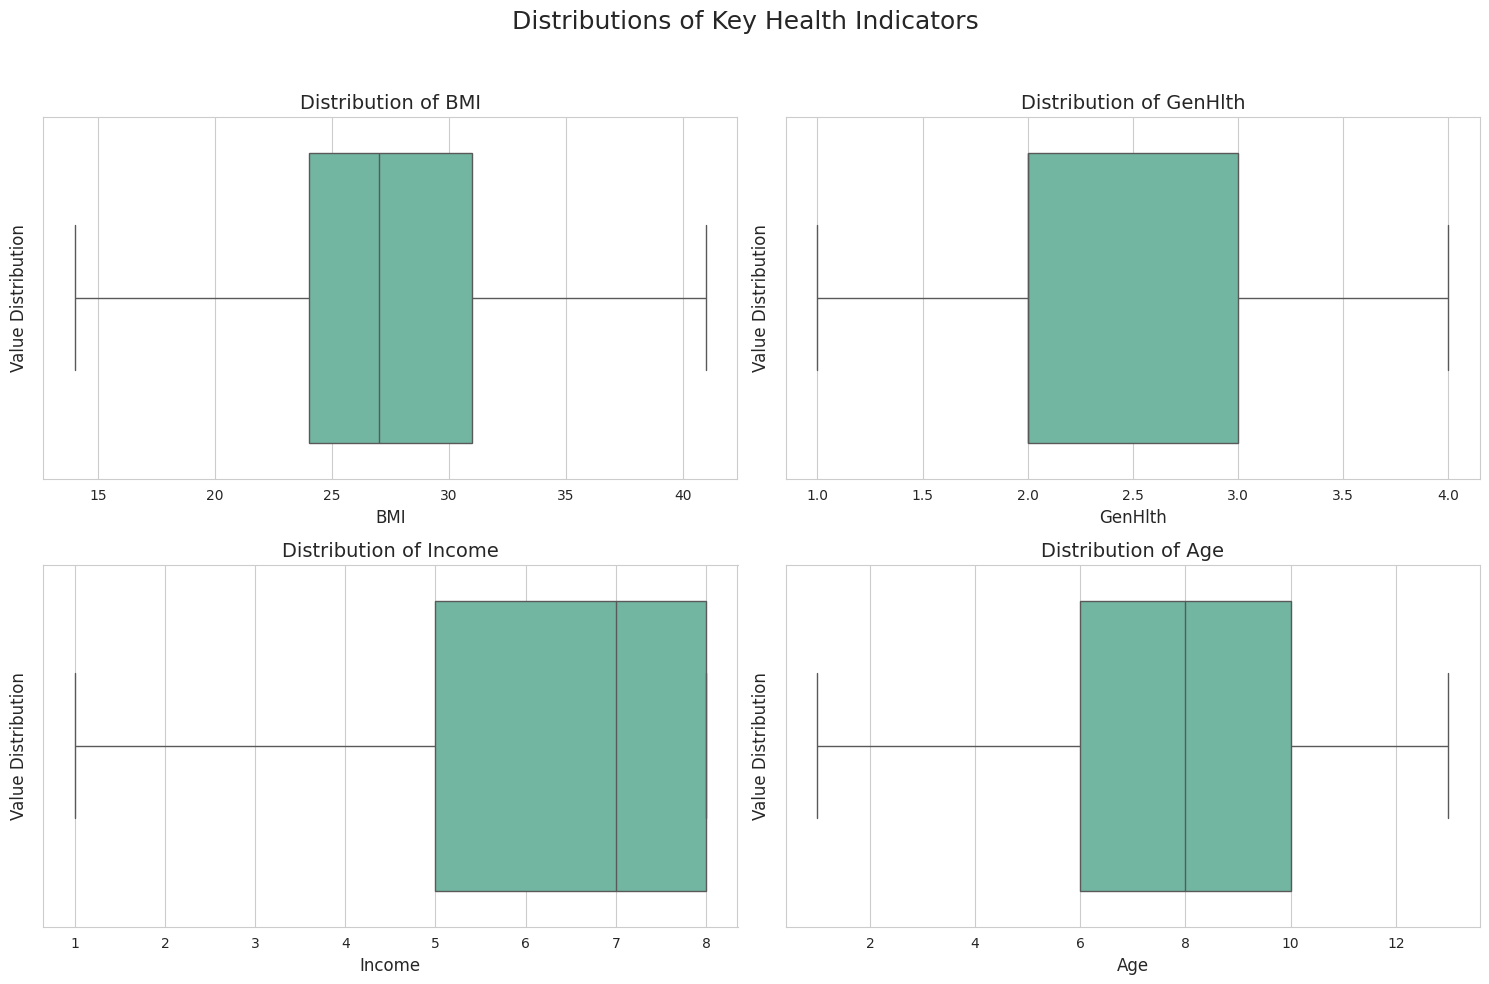

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


diabetes = pd.read_csv('diabetes.csv')

sns.set_style('whitegrid')

plt.figure(figsize=(15, 15))
columns = [ 'BMI', 'GenHlth', 'Income', 'Age', 'HighBP']

for i, col in enumerate(columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=diabetes, x=col, hue=None, palette='Set2', showfliers=False)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Value Distribution', fontsize=12)

plt.suptitle("Distributions of Key Health Indicators", fontsize=18, y=0.92)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

# Model Evaluation

Model Evaluation: Comparing Decision Tree and Random Forest with SMOTE
In this project, we compared the performance of two models for predicting whether an individual is diabetic, pre-diabetic, or non-diabetic: a Decision Tree Classifier and a Random Forest Classifier. We also used SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the Random Forest model to address the class imbalance in the dataset.

1. Decision Tree Classifier (Unbalanced Data)

The Decision Tree Classifier was trained on the original, unbalanced dataset, where the majority class (non-diabetic) outnumbers the minority classes (pre-diabetic and diabetic). The decision tree model is prone to biasing its predictions towards the majority class, which impacts its ability to detect the minority classes effectively.

Performance Metrics for Decision Tree:

Precision:
Non-Diabetic (0): 0.85
Pre-Diabetic (1): >.005
Diabetic (2): >.005

Recall:
Non-Diabetic (0): 1.00
Pre-Diabetic (1): >0.05
Diabetic (2): >0.05
F1-Score:
Non-Diabetic (0): 0.91
Pre-Diabetic (1): >0.05
Diabetic (2): >0.05
Interpretation:

Non-Diabetic (0): The decision tree classifier performs very well in predicting non-diabetic individuals, with high precision (0.85) and recall (1.00). This is expected since non-diabetics dominate the dataset.
Pre-Diabetic (1) and Diabetic (2): Precision, recall, and F1-scores for both pre-diabetics and diabetics are extremely low. This shows the model is failing to identify these minority classes, which is a common issue with unbalanced datasets.

2. Random Forest Classifier (With SMOTE)

To address the class imbalance, we used SMOTE to balance the dataset by generating synthetic examples for the minority classes before training the Random Forest Classifier. The random forest model, being an ensemble of multiple decision trees, can capture more complex patterns in the data, which may help with identifying minority classes better than a single decision tree.

Performance Metrics for Random Forest (with SMOTE):

Precision:
Non-Diabetic (0): 0.77
Pre-Diabetic (1): 0.77
Diabetic (2): 0.65
Recall:
Non-Diabetic (0): 0.70
Pre-Diabetic (1): 0.78
Diabetic (2): 0.70
F1-Score:
Non-Diabetic (0): 0.73
Pre-Diabetic (1): 0.77
Diabetic (2): 0.67
Confusion Matrix for Random Forest (with SMOTE):
[[29785  3532  9438]
 [ 2637 33136  6952]
 [ 6177  6479 30086]]

Confusion Matrix Analysis:

Non-Diabetic (0): 29,785 true negatives, but the model misclassified 3,532 pre-diabetics and 9,438 diabetics as non-diabetic, showing some difficulty in distinguishing non-diabetics from the minority classes.
Pre-Diabetic (1): 33,136 true positives, but 6,952 diabetics were misclassified as pre-diabetic.
Diabetic (2): 30,086 true positives, but there were 6,177 non-diabetics and 6,479 pre-diabetics misclassified as diabetics.
Conclusion:

SMOTE improved the Random Forest's ability to detect pre-diabetic and diabetic individuals compared to the Decision Tree, but performance for diabetics still needs improvement.
The Decision Tree was effective at detecting non-diabetic cases but struggled with minority classes due to the class imbalance.
The Random Forest with SMOTE showed a better balance between precision and recall across all classes, successfully identifying more pre-diabetic and diabetic cases than the Decision Tree, though diabetic detection remains a challenge.
This evaluation demonstrates the positive impact of SMOTE on improving the Random Forest’s ability to handle imbalanced datasets, though further adjustments may still be needed to optimize detection of diabetic individuals.

## Model Deployment:

The various applications of a diabetes prediction model could significantly benefit healthcare, public health, and individual wellness management. In a healthcare setting, the model could be implemented in clinics or hospitals to assist providers in assessing a patient's risk of developing diabetes based on key data such as BMI, general health status, and blood pressure. This would enable healthcare professionals to identify high-risk patients and prioritize interventions effectively.

Another promising use case is integrating the model into wellness applications or wearable devices. Users could input personal information into a mobile application to receive real-time predictions and specific recommendations for improving health metrics such as BMI or cholesterol levels. For researchers, the model would serve as a powerful analytical tool to study trends in the prevalence of diabetes and assess how demographic or socioeconomic factors influence diabetes risk in different populations.

To deploy the model, it could be set up as a on cloud platforms such as Google Cloud. This would allow for easy integration into any web-based or desktop software related to healthcare. The model could also be embedded into a mobile app for direct use by end-users, providing an intuitive and user-friendly interface for doctors and patients to enter data and interpret predictions. Post-deployment, it is essential to monitor the model's performance and address any potential declines in prediction accuracy. Regular retraining with updated datasets will ensure that the model remains relevant and accurate over time.

However, deploying this model comes with challenges. The most significant issue is data privacy and security. Compliance with regulations such as GDPR must be strictly observed to protect user data. Another challenge involves bias and fairness if the training dataset lacks diversity, the model may underperform for underrepresented groups, leading to inequitable predictions. Careful attention must be given to building a representative dataset.

Other considerations include interpretability. While linear and logistic regression models are relatively easy to explain, random forest models can be complex and difficult to explain to non-technical stakeholders, such as healthcare providers. There is also the risk of over-reliance on the model to the detriment of clinical judgment; predictions should always be considered supplementary and not definitive. Deployment across various cloud platforms or integration within integrated systems, such as electronic health records, may entail licensing fees or other substantial costs, potentially presenting challenges for smaller organizations.

In summary, this diabetes prediction model holds immense potential to enhance healthcare decision-making, public health planning, and individual health management. However, successfully addressing challenges related to privacy, fairness, interpretability, and cost will be crucial. Regular monitoring and updates will ensure that the model remains accurate, equitable, and aligned with real-world needs.
